#**Importing neccessary Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
!pip install imbalanced-learn


In [2]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.6 MB/s eta 0:00:00


#**Loading the Dataset**

In [20]:
data_set=pd.read_csv("bank-additional-full.csv",sep=";")
data_set["y"]=(data_set["y"]=="yes").astype(int)

#**Dataset Overview and Summary**

In [ ]:
data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
data_set.tail()

In [ ]:
data_set.sample(10)

In [ ]:
data_set.shape

(4119, 21)

In [ ]:
data_set.info()

In [ ]:
data_set.duplicated().sum()

In [ ]:
data_set.isnull().sum()

In [ ]:
data_set.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
data_set["y"].value_counts()

,count
y,
0,3668
1,451


#**Visualization**

In [ ]:
figure = px.histogram(data_set, x='y', color='y')
figure.update_layout(xaxis_title='Subscription',yaxis_title='Total Count of customers',bargap=0.2)
figure.show()

**Remarks-**
- Dataset is highly imbalance

In [ ]:
figure = px.histogram(data_set, x='job', color='job')
figure.update_layout(xaxis_title='Job Categories',yaxis_title='Total customers')
figure.show()

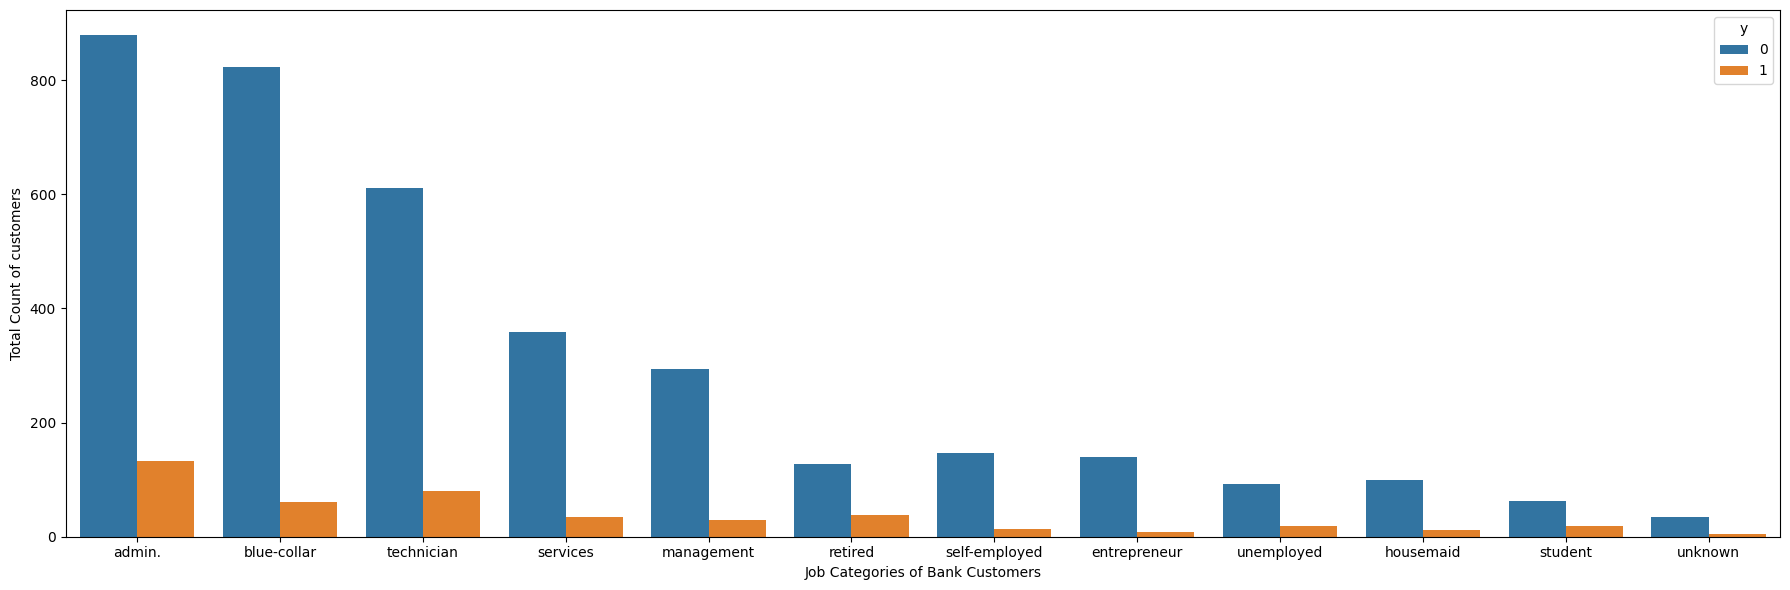

In [ ]:
#customers who subscribed , job category wise
plt.figure(figsize=(18,6))
sns.countplot(x='job',hue='y', data=data_set, order=data_set['job'].value_counts().index)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of customers', color='black')
plt.tight_layout()
plt.show()

In [ ]:
categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for column in categorical:
    figure = px.pie(data_set, names=column, title=f"Customers Percentage for column {column}",
                 hole=0.3, color_discrete_sequence=px.colors.qualitative.Plotly)
    figure.update_traces(textinfo='percent+label')
    figure.show()

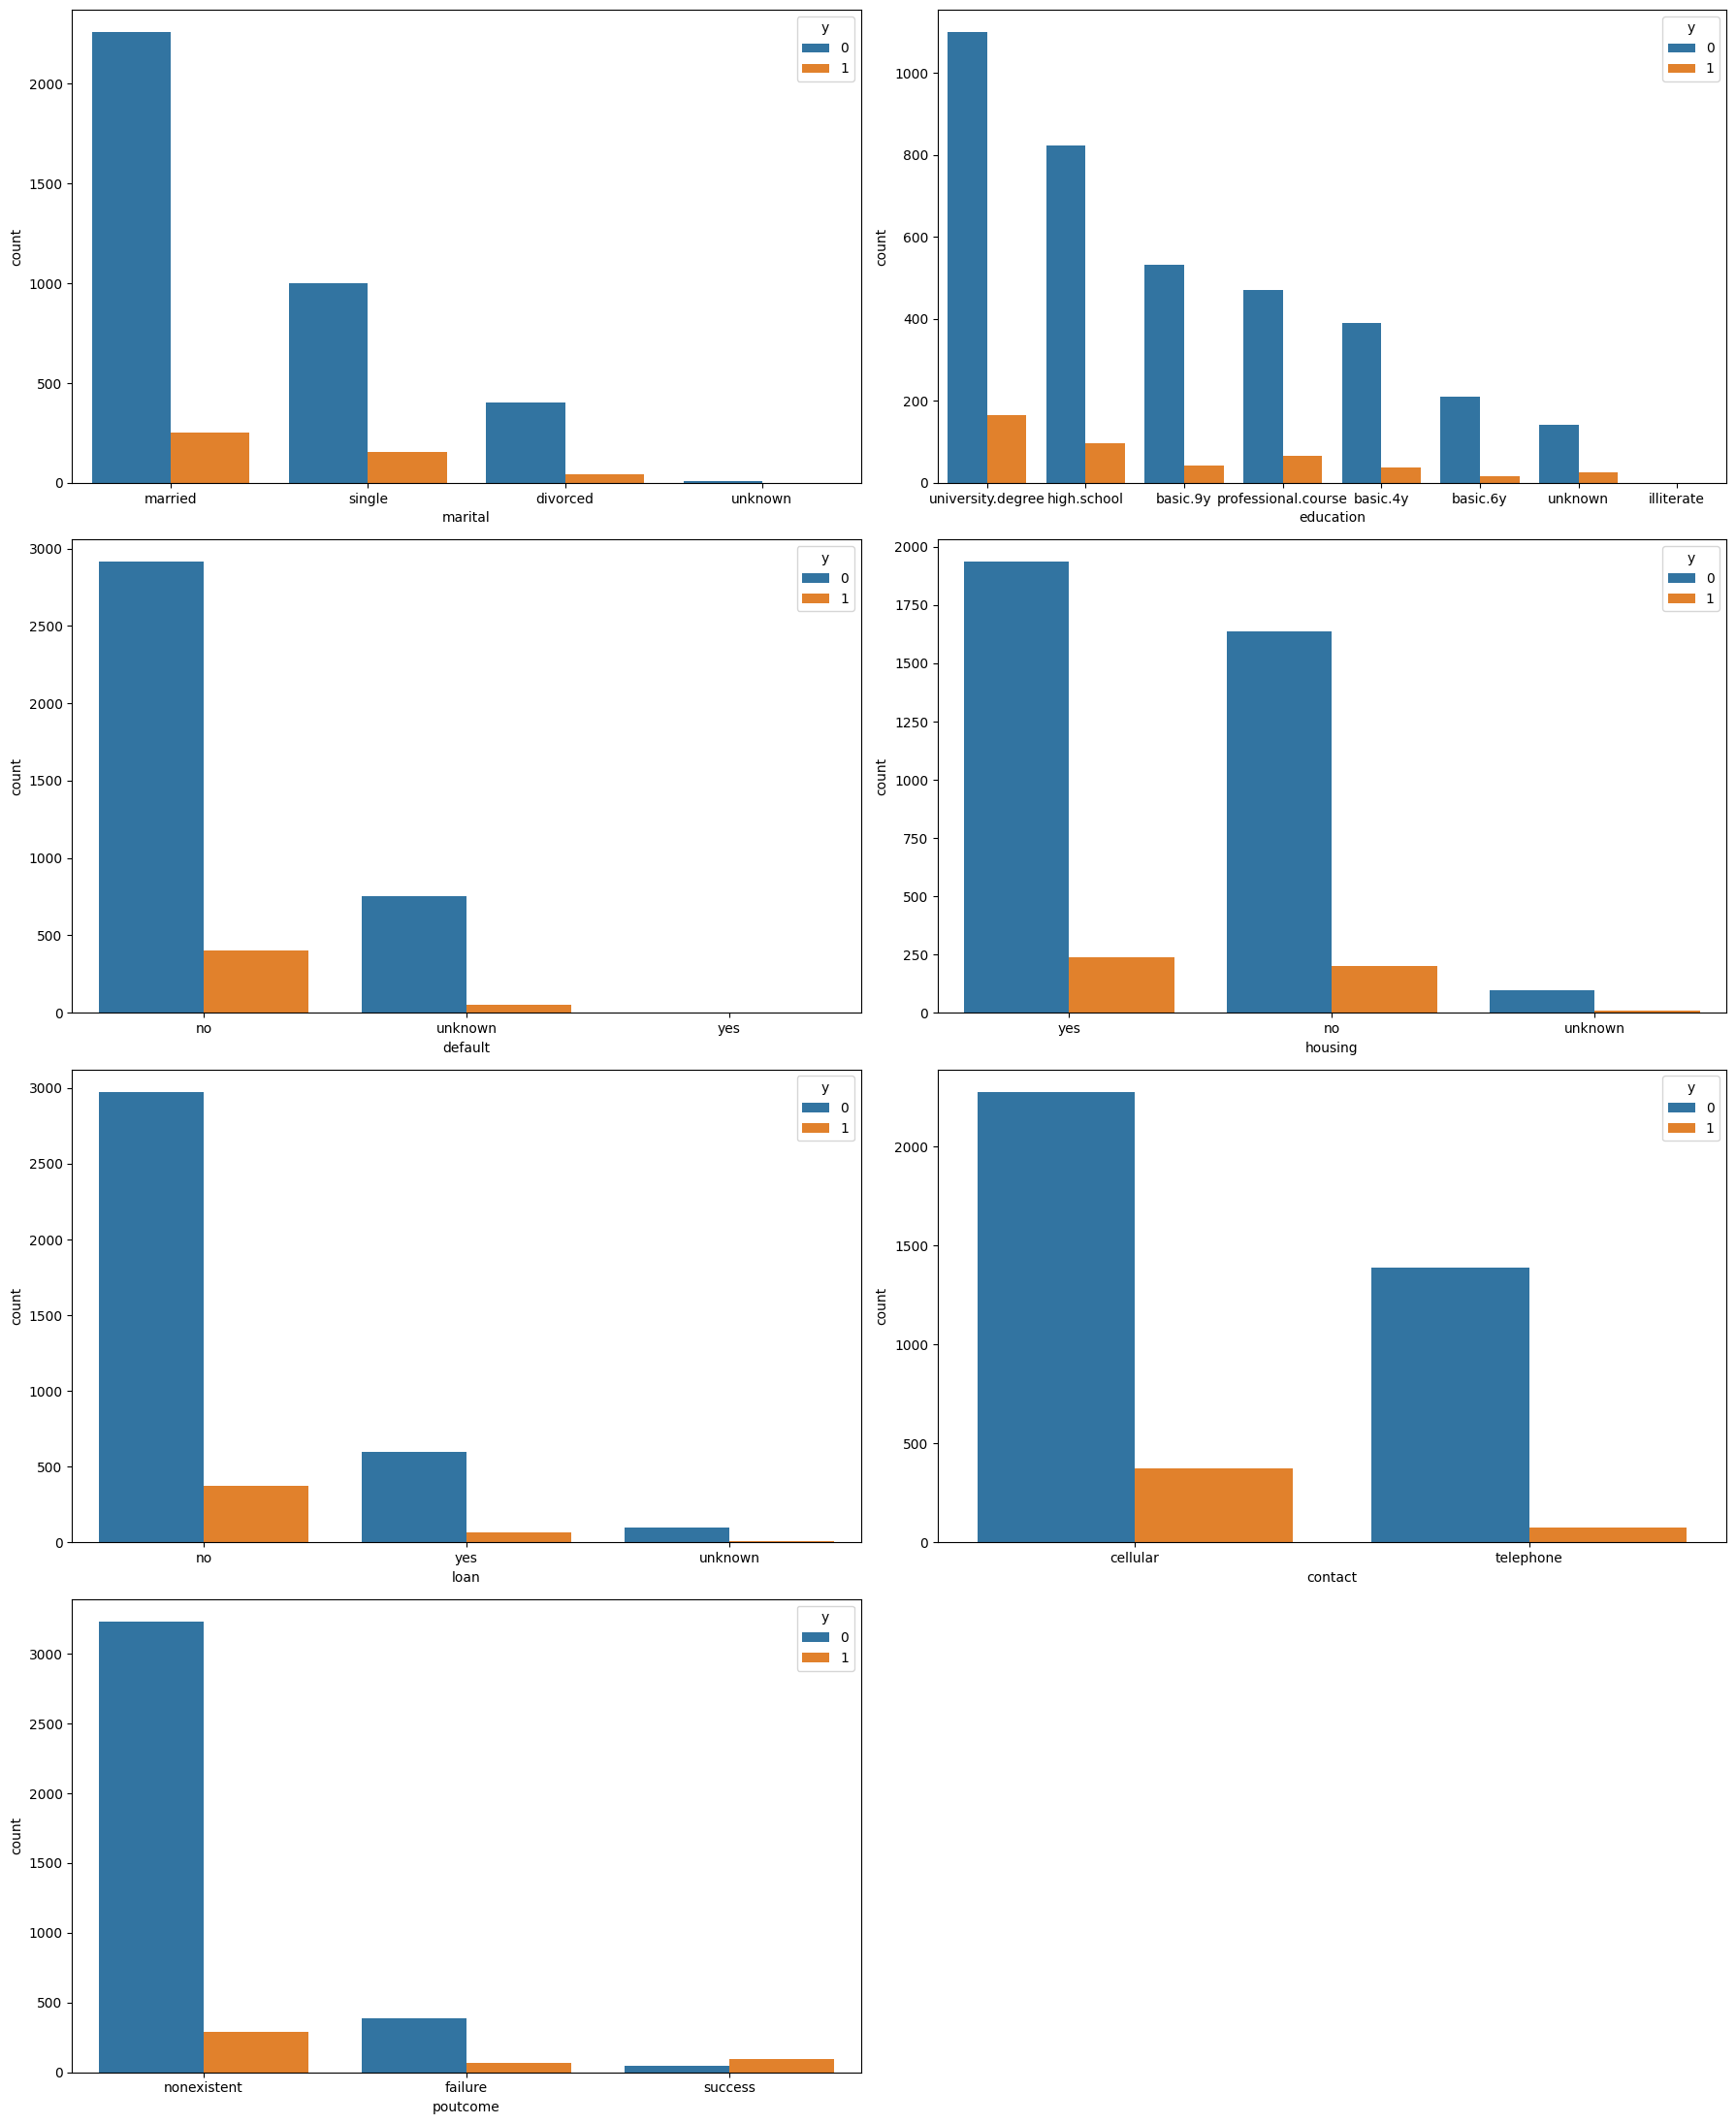

In [ ]:
categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(4,2,n)
  sns.countplot(x = column, hue='y', data=data_set, order=data_set[column].value_counts().index)
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
plt.show()

**Outliers**

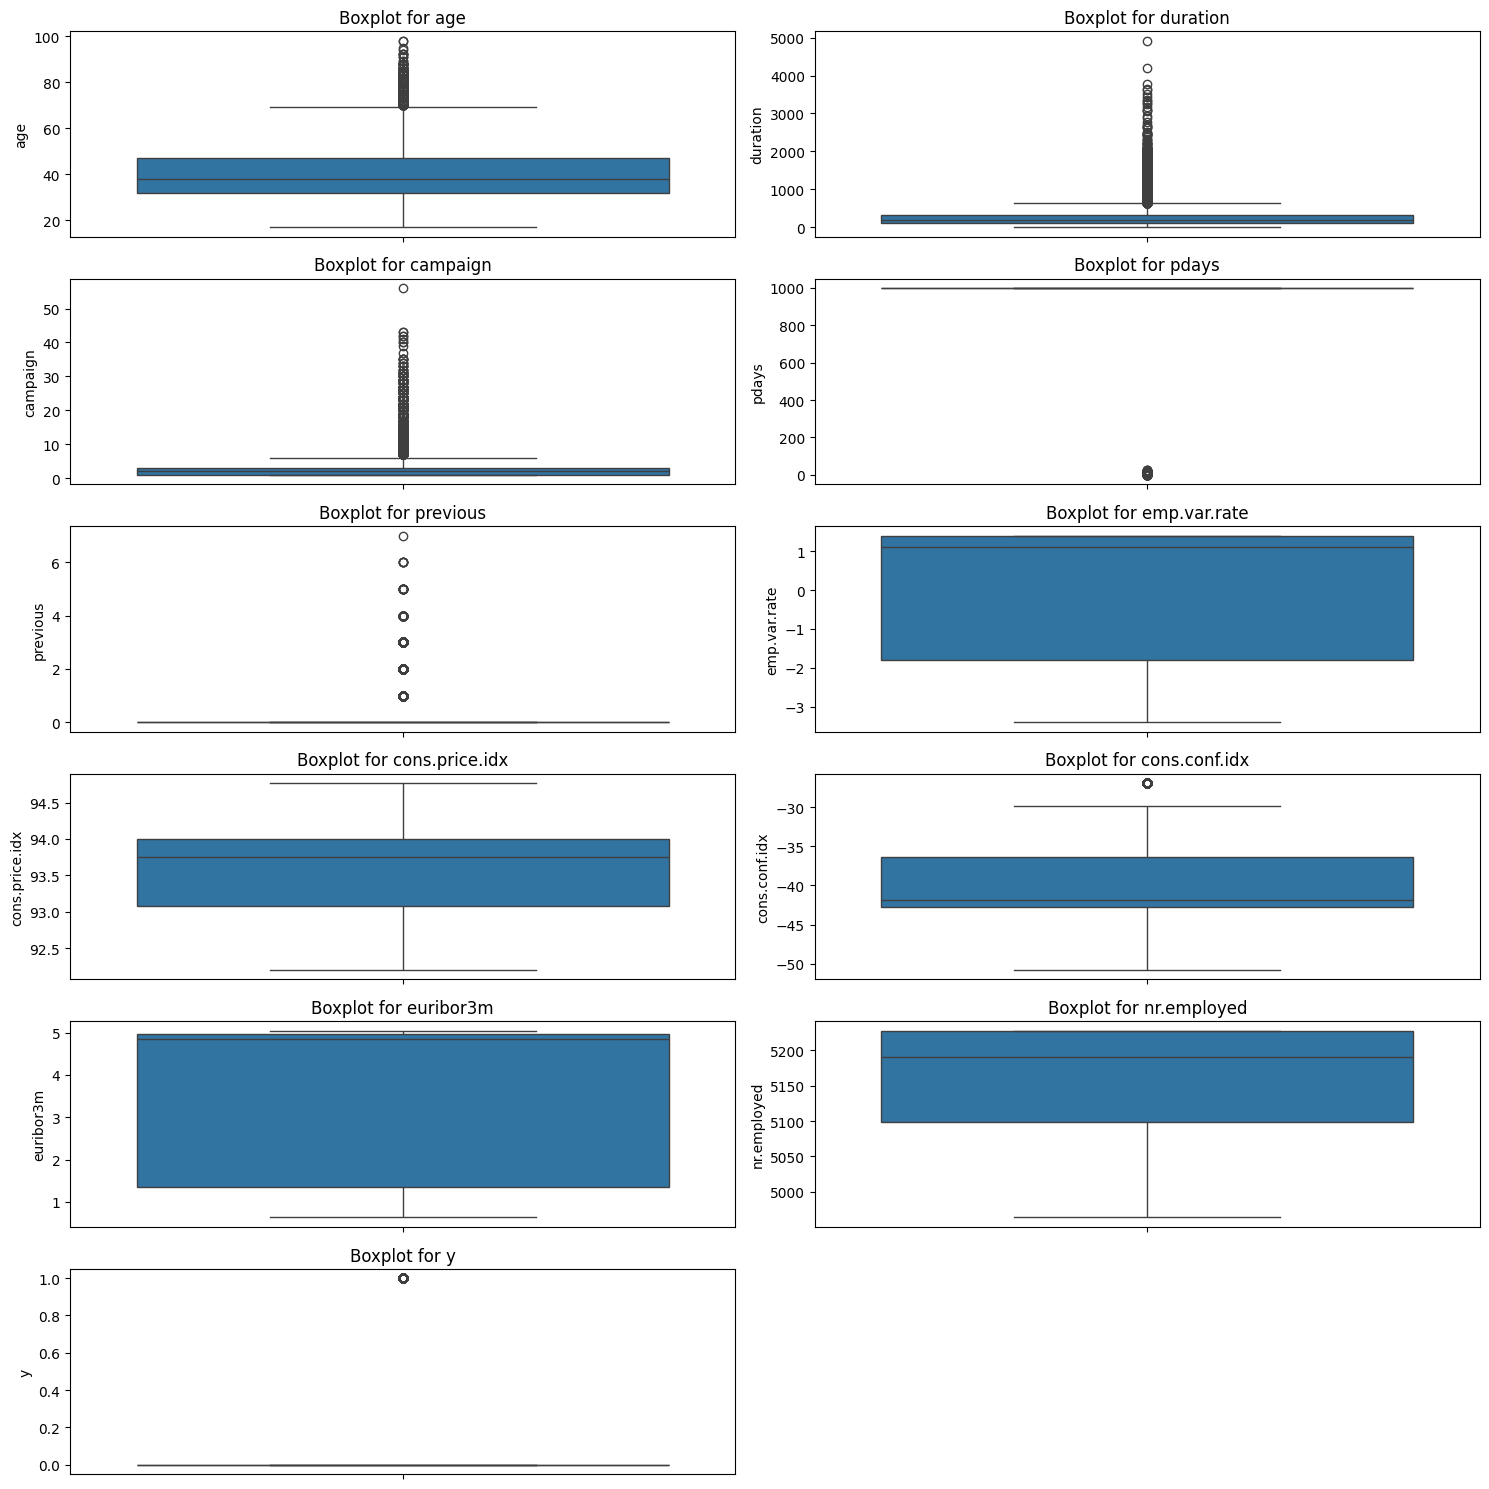

In [ ]:
numerical=data_set.select_dtypes(include=["int64","float64"]).columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical):
    plt.subplot(6, 2, i + 1)  # Adjust grid size based on the number of numerical columns
    sns.boxplot(data_set[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

#**Feature Engineering**

In [21]:
#Create Bin features
month={"jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,
      "aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

data_set["month_num"]=data_set["month"].map(month)

#Season features
data_set["winter"] = data_set["month_num"].isin([12,1,2]).astype(int)
data_set["spring"] = data_set["month_num"].isin([3,4,5]).astype(int)
data_set["summer"] = data_set["month_num"].isin([6,7,8]).astype(int)
data_set["autumn"] = data_set["month_num"].isin([9,10,11]).astype(int)

#day features
data_set["weekend"] = data_set["day_of_week"].isin(["sat","sun"]).astype(int)



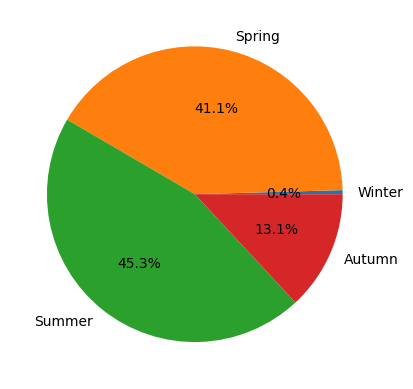

In [ ]:
labels = ['Winter', 'Spring', 'Summer', 'Autumn']
sizes = [data_set['winter'].sum(), data_set['spring'].sum(), data_set['summer'].sum(), data_set['autumn'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [22]:
#Categorical features
categorical_features=["job","marital","education","default","housing",
                      "loan","contact","month","day_of_week","poutcome"]

#encoding
le=LabelEncoder()
for col in categorical_features:
  data_set[f'{col}_encoded']=le.fit_transform(data_set[col])


In [23]:
#Binned features
data_set["age_bin"]=pd.qcut(data_set["age"],q=5, labels=["very_young","young","middle","senior","elderly"])
data_set["duration_bin"] = pd.qcut(data_set["duration"],q=5, labels=["very_short", "short","medium","long","very_long"])
data_set["campaign_bin"] = pd.cut(data_set["campaign"],bins=[0,2,4,6,8, np.inf],
                                  labels=["very_few","few","medium","many","very_many"])


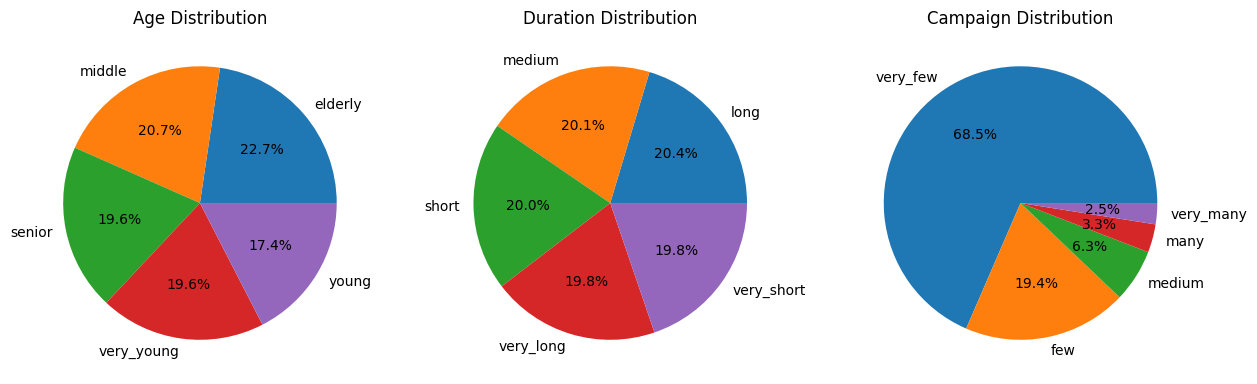

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.pie(data_set['age_bin'].value_counts(), labels=data_set['age_bin'].unique(), autopct='%1.1f%%')
ax1.set_title('Age Distribution')
ax2.pie(data_set['duration_bin'].value_counts(), labels=data_set['duration_bin'].unique(), autopct='%1.1f%%')
ax2.set_title('Duration Distribution')
ax3.pie(data_set['campaign_bin'].value_counts(), labels=data_set['campaign_bin'].unique(), autopct='%1.1f%%')
ax3.set_title('Campaign Distribution')
plt.show()

In [24]:
#Numeric columns
numeric_features=["age","duration","campaign","pdays","previous",
                  "emp.var.rate", "cons.price.idx","cons.conf.idx",
                  "euribor3m","nr.employed"]
original_data = data_set[numeric_features].copy()
for column in numeric_features:
  Q1=data_set[column].quantile(0.25)
  Q3=data_set[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound= Q1-3*IQR
  upper_bound= Q3+3*IQR
  data_set[column] = data_set[column].clip(lower=lower_bound, upper=upper_bound)

In [25]:
#aggregate features
data_set["total_contacts"]=data_set["campaign"] + data_set["previous"]
data_set["contact_rate"]  =data_set["campaign"]/(data_set["previous"]+1)
data_set["economic_sentiment"]= data_set["emp.var.rate"] *data_set["cons.conf.idx"]
data_set["market_conditions"]=data_set["cons.price.idx"]*data_set["euribor3m"]

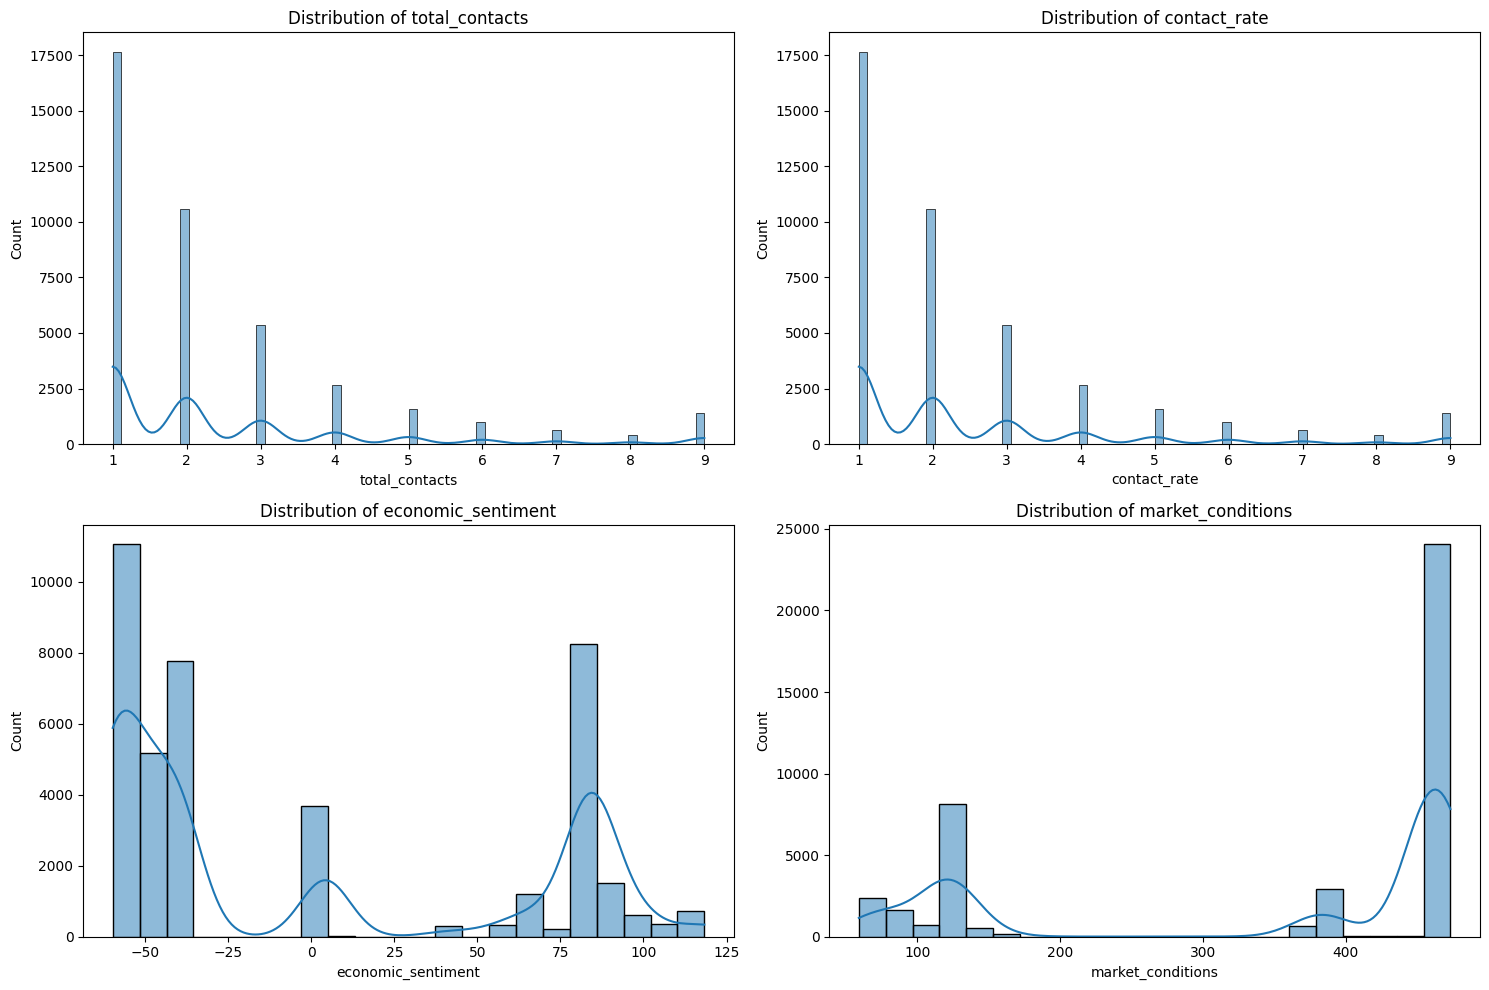

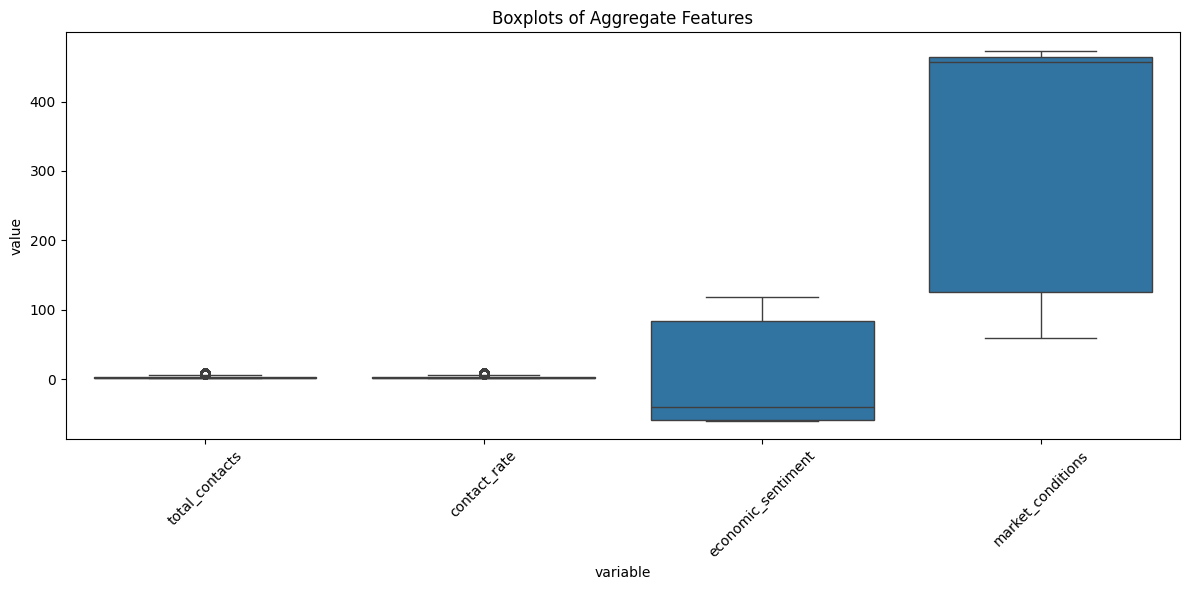

In [ ]:
agg_features = ['total_contacts', 'contact_rate',
                'economic_sentiment', 'market_conditions']

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(agg_features, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data=data_set[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
data_melted = data_set[agg_features].melt()
sns.boxplot(x='variable', y='value', data=data_melted)
plt.xticks(rotation=45)
plt.title('Boxplots of Aggregate Features')
plt.tight_layout()
plt.show()

In [26]:
#interaction features
data_set["age_by_job"] = data_set["age"] * data_set["job_encoded"]
data_set["age_by_education"] = data_set["age"] * data_set["education_encoded"]
data_set["duration_by_contact"] = data_set["duration"] * data_set["contact_encoded"]
data_set["duration_by_month"] = data_set["duration"] * data_set["month_num"]
data_set["campaign_by_previous"] = data_set["campaign"] * data_set["previous"]
data_set["campaign_by_outcome"] = data_set["campaign"] * data_set["poutcome_encoded"]
data_set["emp_rate_by_euribor"] = data_set["emp.var.rate"] * data_set["euribor3m"]
data_set["price_by_confidence"] = data_set["cons.price.idx"] * data_set["cons.conf.idx"]

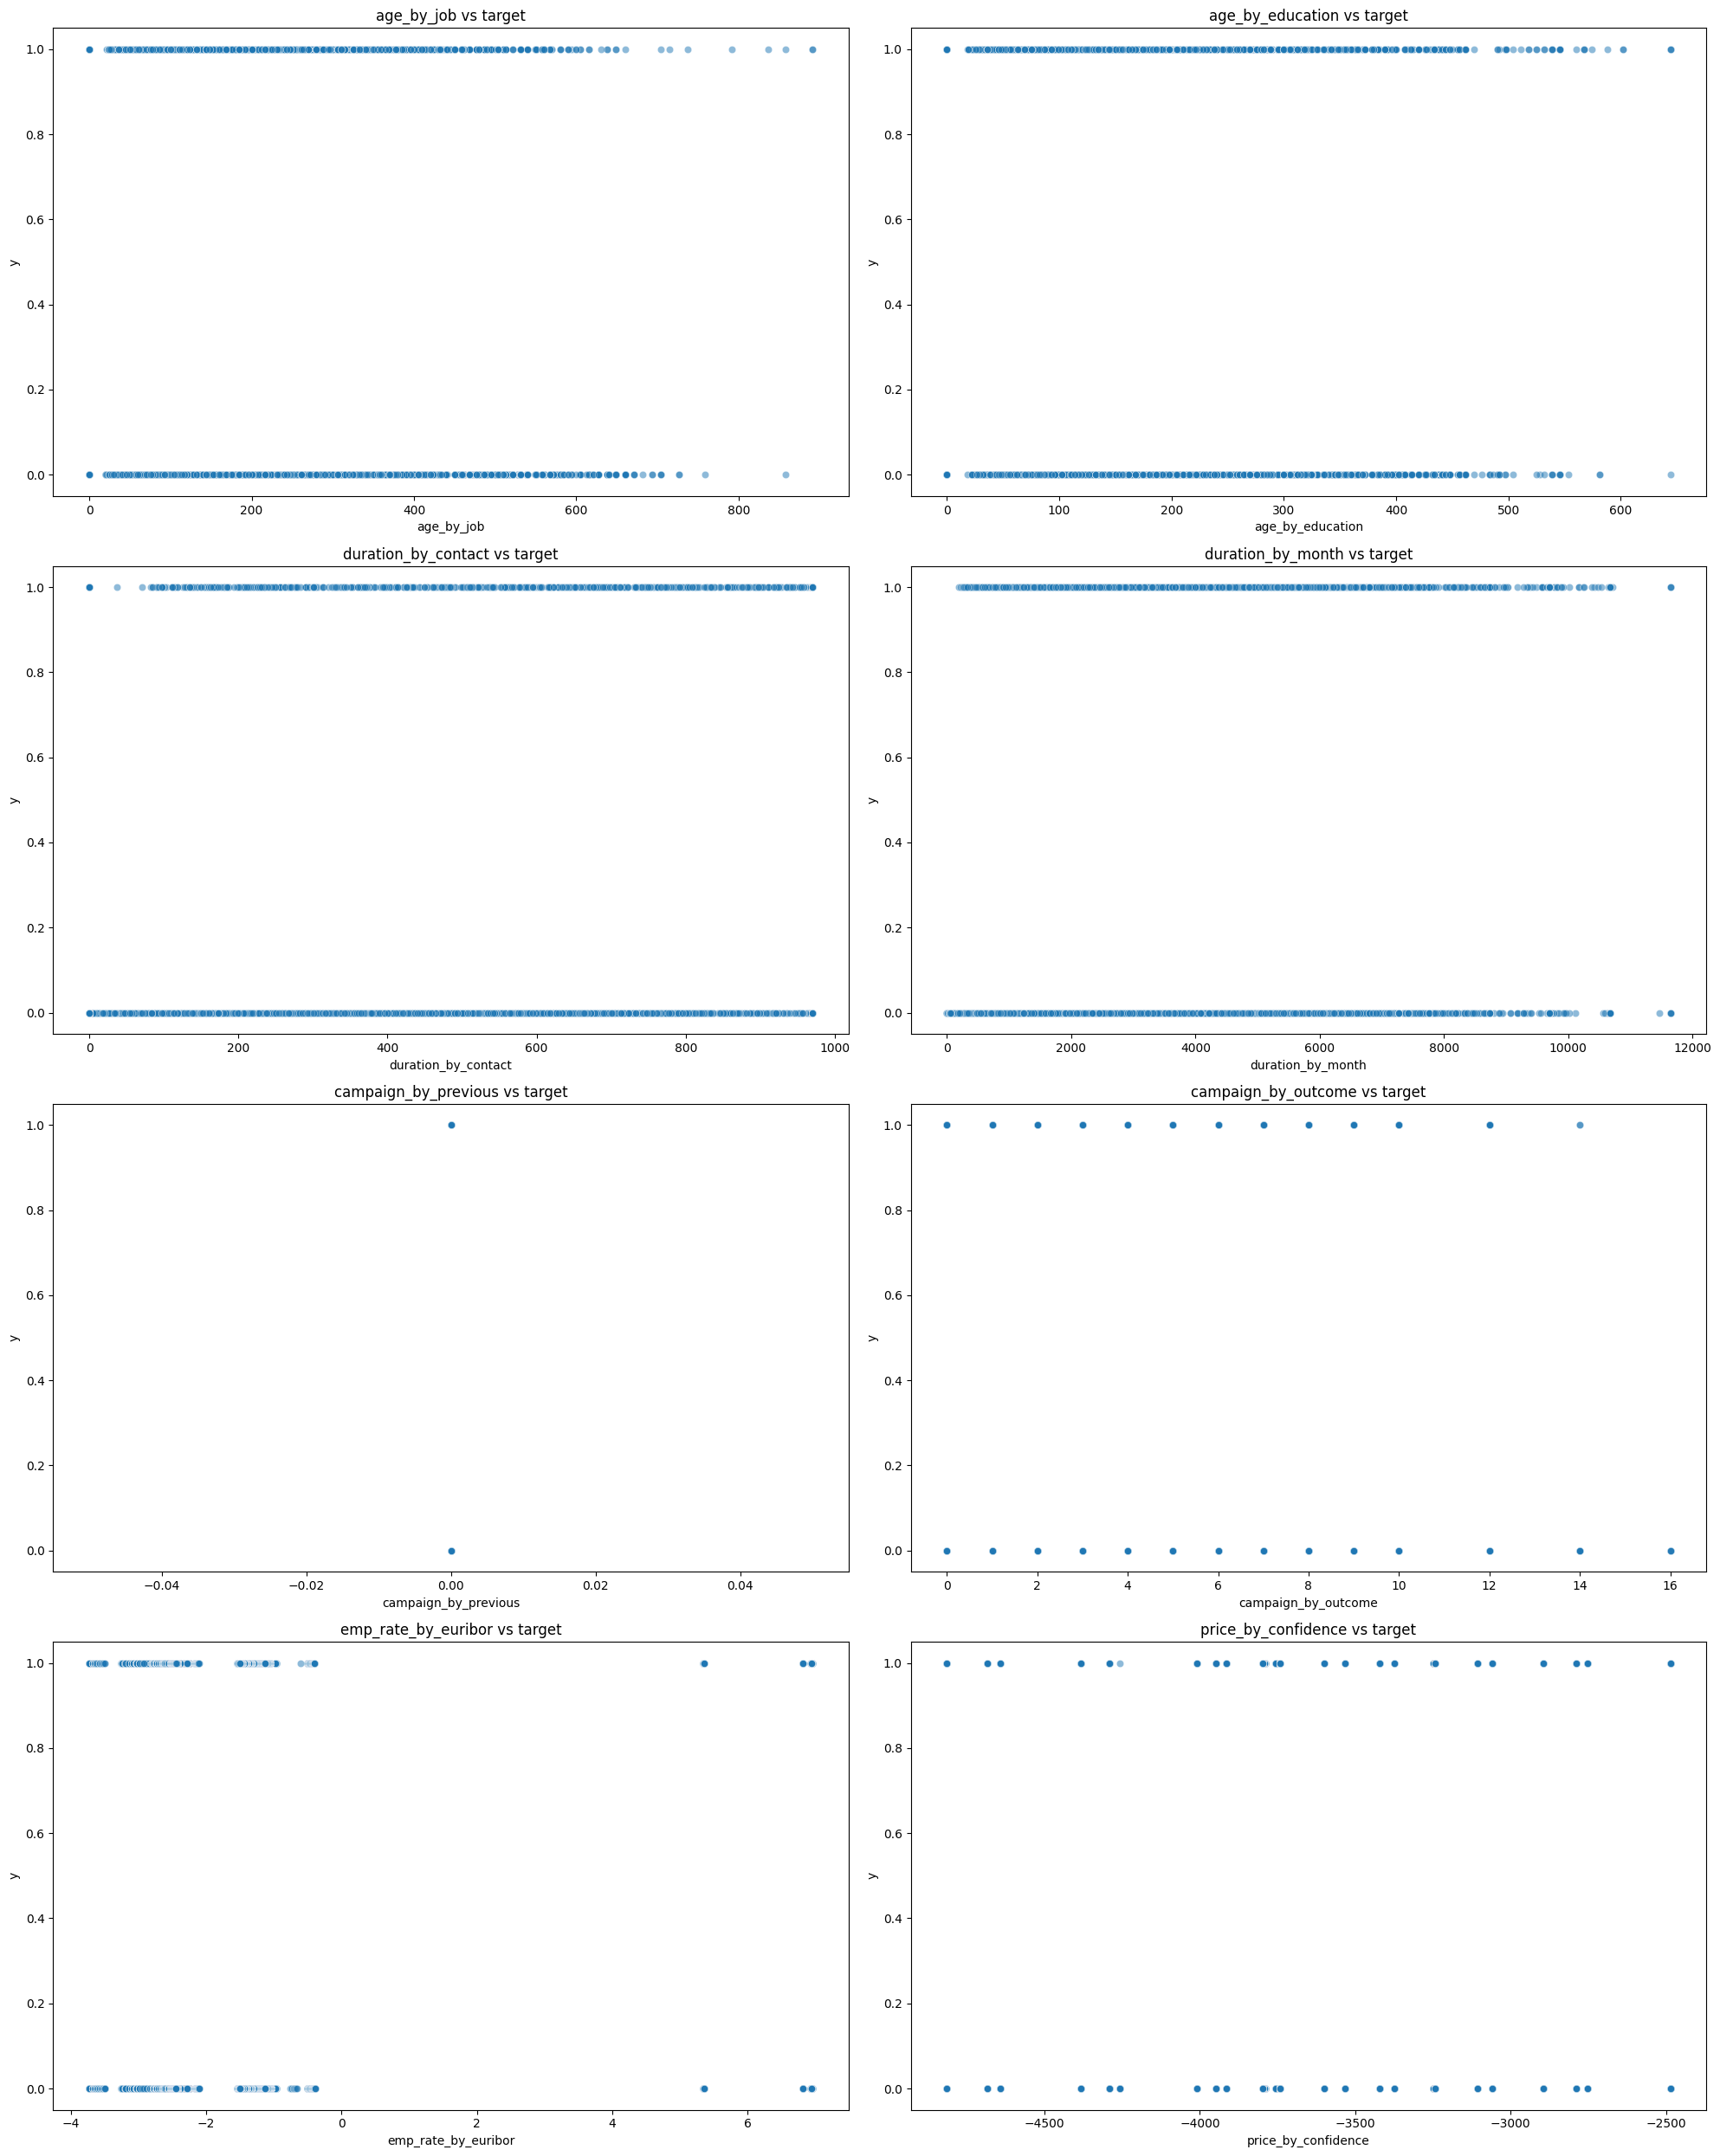

In [ ]:
fig = plt.figure(figsize=(20, 25))
features = ['age_by_job', 'age_by_education', 'duration_by_contact', 'duration_by_month',
           'campaign_by_previous', 'campaign_by_outcome', 'emp_rate_by_euribor', 'price_by_confidence']
for idx, feature in enumerate(features, 1):
    plt.subplot(4, 2, idx)
    sns.scatterplot(data=data_set, x=feature, y='y', alpha=0.5)
    plt.title(f'{feature} vs target')
plt.tight_layout()
plt.show()

In [27]:
#Encode bin columns
for col in ["age_bin","duration_bin","campaign_bin"]:
  data_set[f'{col}_encoded']= le.fit_transform(data_set[col])

features_to_drop= categorical_features + ["age_bin","duration_bin","campaign_bin"]
data_set=data_set.drop(features_to_drop,axis=1)

In [28]:
#features and target
X= data_set.drop("y",axis=1)
y= data_set["y"]

#Remove correlated features
corr_matrix= X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.85)]
X=X.drop(to_drop, axis=1)


In [29]:
#feature selection using random forest
sel_model = RandomForestClassifier(n_estimators=200, random_state=42)
sel_model.fit(X,y)
selector= SelectFromModel(sel_model, prefit=True, threshold="median")
feature_idx=selector.get_support()
feature_names=X.columns[feature_idx]
X= X[feature_names]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

scaler=RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


#**Random Forest**

In [31]:
#Training the model
param_grid={
    "n_estimators":[300],
    "max_depth" :[20],
    "min_samples_split": [10],
    "min_samples_leaf":[1],
    "max_features":["sqrt"],
    "class_weight":["balanced_subsample"],
    "criterion" : ["entropy"],
    "bootstrap": [True],
    "max_samples":[0.8]
}

base_rf= RandomForestClassifier(random_state=42, n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_random=RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced_subsample'],
                                        'criterion': ['entropy'],
                                        'max_depth': [20],
                                        'max_features': ['sqrt'],
                                        'max_samples': [0.8],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [10],
                                        'n_estimators': [300]},
                   random_state=42, scoring='f1', verbose=1)

In [32]:
# Make predictions and evaluate
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Print results
print("\nBest Parameters:")
print(rf_random.best_params_)

print("\nFeature Importances:")
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)
print(importances.head(10))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Best Parameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': True}

Feature Importances:
                 feature  importance
1               duration    0.292571
3           emp.var.rate    0.134100
14  duration_bin_encoded    0.117162
5          cons.conf.idx    0.070296
4         cons.price.idx    0.056190
0                    age    0.053552
12   duration_by_contact    0.052102
11      poutcome_encoded    0.049162
9          month_encoded    0.036190
6            job_encoded    0.027691

Accuracy Score: 0.9078659868900218

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7310
           1       0.56      0.82      0.67       928

    accuracy                           0.91      8238
   macro avg       0.77      0.87      0.81      8238
weighted 

In [ ]:
# Try different thresholds
print("\nTesting different probability thresholds:")
thresholds = [0.3, 0.4, 0.5, 0.6]
for threshold in thresholds:
    print(f"\nThreshold: {threshold}")
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    print(classification_report(y_test, y_pred_threshold))



Testing different probability thresholds:

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.46      0.93      0.61       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.77      8238
weighted avg       0.93      0.87      0.89      8238


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7310
           1       0.50      0.88      0.64       928

    accuracy                           0.89      8238
   macro avg       0.74      0.89      0.79      8238
weighted avg       0.93      0.89      0.90      8238


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7310
           1       0.56      0.82      0.67       928

    accuracy                           0.91      8238
   macro avg       0.77      0.87    

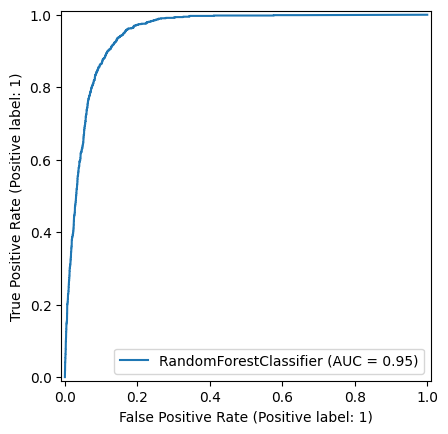

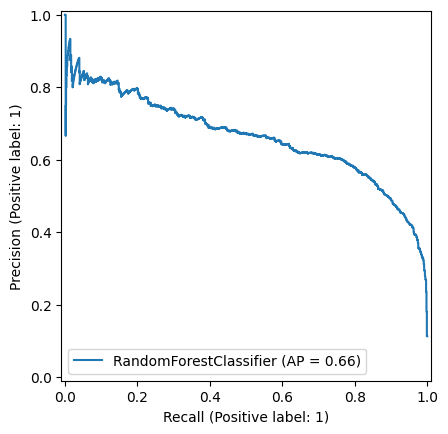


Cross-validation scores: [0.90015175 0.90515933 0.89468892 0.89559939 0.9016692 ]

Mean CV score: 0.90
CV score std: 0.003886096097726025


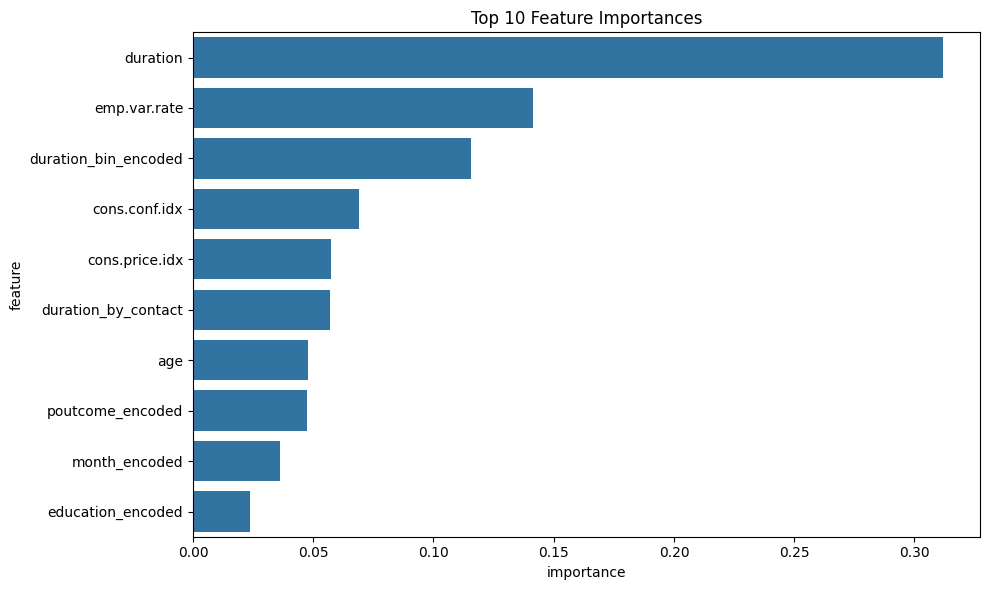

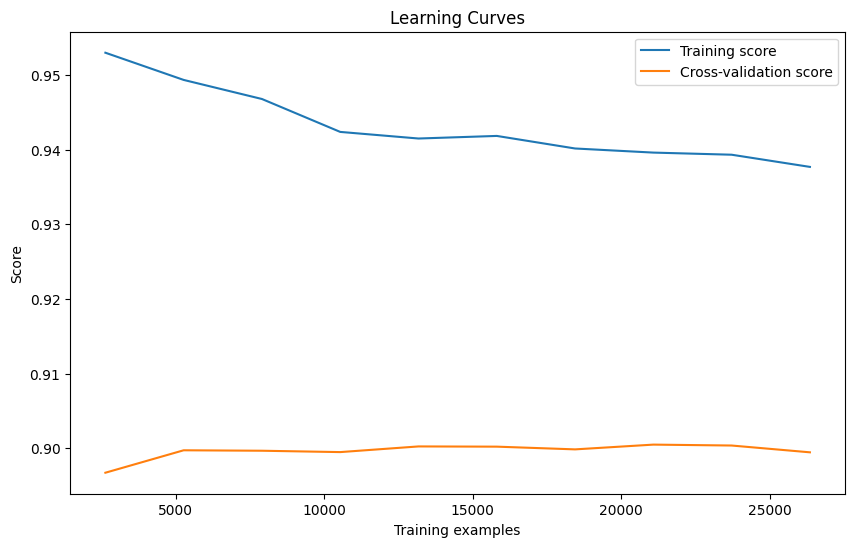

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.show()

# Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"\nMean CV score: {cv_scores.mean():.2f}")
print("CV score std:", cv_scores.std())

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

# Learning curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [ ]:
train_accuracy = best_rf.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.5f}")

# Check testing accuracy
test_accuracy = best_rf.score(X_test_scaled, y_test)
print(f"Testing Accuracy: {test_accuracy:.5f}")

Training Accuracy: 0.95205
Testing Accuracy: 0.91626


#**Neural Network**

In [33]:
def weighted_binary_crossentropy(y_true, y_pred, pos_weight=2.0):
    y_true = tf.cast(y_true, tf.float32)
    weights = tf.where(tf.equal(y_true, 1), pos_weight * tf.ones_like(y_true), tf.ones_like(y_true))
    binary_crossentropy = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weighted_loss = weights * binary_crossentropy
    return tf.reduce_mean(weighted_loss)

def build_model(input_dim, pos_weight=2.0):
    inputs = Input(shape=(input_dim,))

    x = Dense(128,
              kernel_initializer='glorot_normal',
              kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.3)(x)

    x = Dense(64,
              kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(1,
                   activation='sigmoid',
                   kernel_initializer='glorot_normal',
                   bias_initializer=tf.keras.initializers.Constant(0.0))(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=lambda y_true, y_pred: weighted_binary_crossentropy(y_true, y_pred, pos_weight),
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            # Modified F1Score configuration
            tf.keras.metrics.F1Score(
                threshold=0.5,
                name='f1',
                dtype=tf.float32
            )
        ]
    )

    return model

def preprocess_data(X_train, X_test, y_train, sampling_ratio=0.3):
    # Power transform features
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    X_train_transformed = pt.fit_transform(X_train)
    X_test_transformed = pt.transform(X_test)

    # Reshape y_train to 2D array
    y_train = np.asarray(y_train).reshape(-1, 1)

    # Controlled resampling
    smt = SMOTETomek(random_state=42, sampling_strategy=sampling_ratio)
    X_train_resampled, y_train_resampled = smt.fit_resample(X_train_transformed, y_train)

    # Ensure y_train_resampled is 2D
    y_train_resampled = y_train_resampled.reshape(-1, 1)

    # Convert to float32
    y_train_resampled = y_train_resampled.astype(np.float32)

    return X_train_resampled, X_test_transformed, y_train_resampled

def find_optimal_threshold(y_true, y_pred_proba):
    thresholds = np.linspace(0.2, 0.8, 30)
    best_score = 0
    best_threshold = 0.5

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        balanced_acc = (sensitivity + specificity) / 2

        f1 = precision_score(y_true, y_pred) * recall_score(y_true, y_pred)
        if f1 > 0:
            f1 = 2 * f1 / (precision_score(y_true, y_pred) + recall_score(y_true, y_pred))

        score = (0.7 * f1) + (0.3 * balanced_acc)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold

# Prepare data
X_train_resampled, X_test_transformed, y_train_resampled = preprocess_data(
    X_train_scaled,
    X_test_scaled,
    y_train
)

# Calculate positive class weight based on resampled data distribution
pos_weight = np.sum(y_train_resampled == 0) / np.sum(y_train_resampled == 1)

# Build model
model = build_model(X_train_scaled.shape[1], pos_weight=pos_weight)

# Training callbacks
early_stopping = EarlyStopping(
    monitor='val_f1',
    mode='max',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1',
    mode='max',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train model
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Final evaluation
y_pred_proba = model.predict(X_test_transformed)
best_threshold = find_optimal_threshold(y_test, y_pred_proba)
y_pred = (y_pred_proba >= best_threshold).astype(int)

print(f"\nOptimal threshold: {best_threshold:.3f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Epoch 1/100
932/932 [==============================] - 5s 3ms/step - loss: 0.6265 - accuracy: 0.9031 - auc: 0.8934 - precision: 0.5513 - recall: 0.3593 - f1: 0.4351 - val_loss: 2.0147 - val_accuracy: 0.6539 - val_auc: 0.9342 - val_precision: 0.9635 - val_recall: 0.5332 - val_f1: 0.6865 - lr: 0.0010
Epoch 2/100
932/932 [==============================] - 3s 3ms/step - loss: 0.3179 - accuracy: 0.9100 - auc: 0.9221 - precision: 0.6005 - recall: 0.3977 - f1: 0.4785 - val_loss: 1.9203 - val_accuracy: 0.6323 - val_auc: 0.9335 - val_precision: 0.9637 - val_recall: 0.5015 - val_f1: 0.6597 - lr: 0.0010
Epoch 3/100
932/932 [==============================] - 3s 3ms/step - loss: 0.2913 - accuracy: 0.9115 - auc: 0.9235 - precision: 0.6097 - recall: 0.4113 - f1: 0.4912 - val_loss: 2.3515 - val_accuracy: 0.5539 - val_auc: 0.9344 - val_precision: 0.9713 - val_recall: 0.3836 - val_f1: 0.5500 - lr: 0.0010
Epoch 4/100
932/932 [==============================] - 3s 3ms/step - loss: 0.2848 - accuracy: 0.9116

258/258 [==============================] - 0s 1ms/step


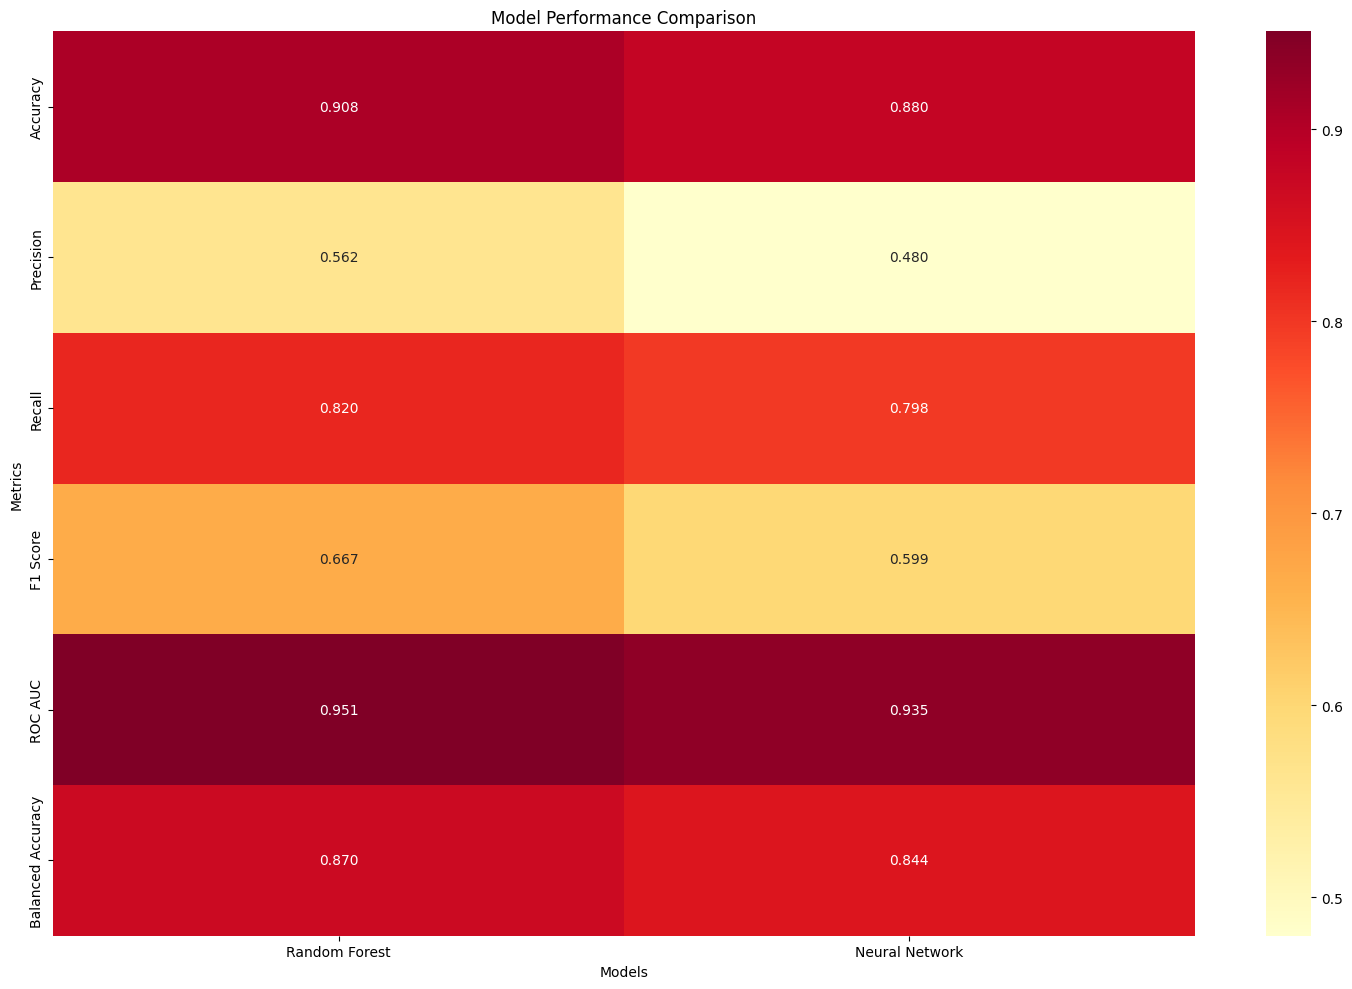

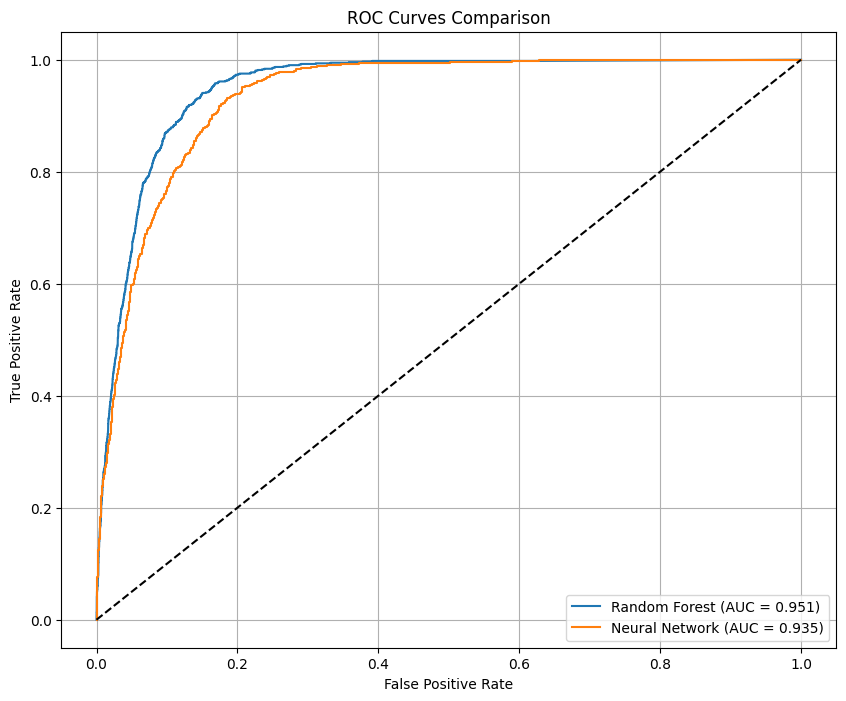

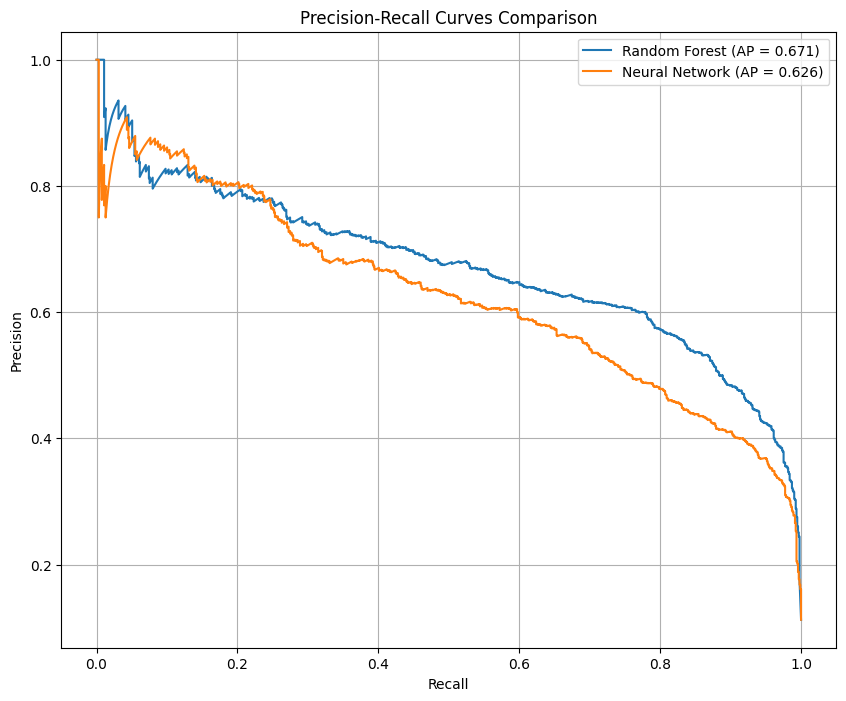


Detailed Model Comparison:
                   Random Forest  Neural Network
Accuracy                  0.9079          0.8797
Precision                 0.5625          0.4796
Recall                    0.8200          0.7985
F1 Score                  0.6673          0.5993
ROC AUC                   0.9506          0.9352
Balanced Accuracy         0.8695          0.8443

McNemar's Test for Model Comparison:
McNemar's test statistic: 160.0000
p-value: 0.0000
Null hypothesis: Models have equal error rates
Conclusion: Reject null hypothesis at 5% significance level


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, precision_recall_curve, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, balanced_accuracy_score,
    average_precision_score
)
from typing import Dict, Any

def compare_models(
    models: Dict[str, Any],
    X_test: np.ndarray,
    y_test: np.ndarray,
    predictions: Dict[str, np.ndarray],
    probabilities: Dict[str, np.ndarray]
) -> Dict[str, Dict[str, float]]:
    """
    Compare multiple models across different metrics.
    """
    # Ensure y_test is 1-dimensional
    y_test = np.ravel(y_test)
    metrics = {}

    for name, pred in predictions.items():
        # Ensure predictions are 1-dimensional
        pred = np.ravel(pred)
        prob = np.ravel(probabilities[name])

        metrics[name] = {
            'Accuracy': accuracy_score(y_test, pred),
            'Precision': precision_score(y_test, pred),
            'Recall': recall_score(y_test, pred),
            'F1 Score': f1_score(y_test, pred),
            'ROC AUC': roc_auc_score(y_test, prob),
            'Balanced Accuracy': balanced_accuracy_score(y_test, pred)
        }

    return metrics

def plot_model_comparison(metrics: Dict[str, Dict[str, float]]):
    """
    Create visualizations comparing model performance.
    """
    # Convert metrics to DataFrame for easier plotting
    df_metrics = pd.DataFrame(metrics).round(3)

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 10))

    # Create heatmap
    sns.heatmap(df_metrics, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('Model Performance Comparison')
    plt.ylabel('Metrics')
    plt.xlabel('Models')

    plt.tight_layout()
    plt.show()

def plot_roc_curves(
    models: Dict[str, Any],
    y_test: np.ndarray,
    probabilities: Dict[str, np.ndarray]
):
    """
    Plot ROC curves for all models.
    """
    # Ensure y_test is 1-dimensional
    y_test = np.ravel(y_test)

    plt.figure(figsize=(10, 8))

    for name, probs in probabilities.items():
        # Ensure probabilities are 1-dimensional
        probs = np.ravel(probs)
        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, probs):.3f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_precision_recall_curves(
    models: Dict[str, Any],
    y_test: np.ndarray,
    probabilities: Dict[str, np.ndarray]
):
    """
    Plot Precision-Recall curves for all models.
    """
    # Ensure y_test is 1-dimensional
    y_test = np.ravel(y_test)

    plt.figure(figsize=(10, 8))

    for name, probs in probabilities.items():
        # Ensure probabilities are 1-dimensional
        probs = np.ravel(probs)
        precision, recall, _ = precision_recall_curve(y_test, probs)
        plt.plot(recall, precision, label=f'{name} (AP = {average_precision_score(y_test, probs):.3f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create dictionaries for models and their predictions
models = {
    'Random Forest': best_rf,
    'Neural Network': model
}

# Get predictions and ensure they're 1-dimensional
rf_predictions = np.ravel(best_rf.predict(X_test_scaled))
nn_predictions = np.ravel((model.predict(X_test_transformed) >= best_threshold).astype(int))

predictions = {
    'Random Forest': rf_predictions,
    'Neural Network': nn_predictions
}

# Get probabilities and ensure they're 1-dimensional
probabilities = {
    'Random Forest': np.ravel(best_rf.predict_proba(X_test_scaled)[:, 1]),
    'Neural Network': np.ravel(model.predict(X_test_transformed))
}

# Ensure y_test is 1-dimensional
y_test = np.ravel(y_test)

# Compare models
metrics = compare_models(models, X_test_scaled, y_test, predictions, probabilities)

# Create visualizations
plot_model_comparison(metrics)
plot_roc_curves(models, y_test, probabilities)
plot_precision_recall_curves(models, y_test, probabilities)

# Print detailed metrics
print("\nDetailed Model Comparison:")
print(pd.DataFrame(metrics).round(4))

# Statistical significance test
print("\nMcNemar's Test for Model Comparison:")
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

# Create contingency table for McNemar's test
rf_incorrect = rf_predictions != y_test
nn_incorrect = nn_predictions != y_test

# Create the contingency table manually
contingency = np.zeros((2, 2))
contingency[0, 0] = np.sum((rf_incorrect == 0) & (nn_incorrect == 0))
contingency[0, 1] = np.sum((rf_incorrect == 0) & (nn_incorrect == 1))
contingency[1, 0] = np.sum((rf_incorrect == 1) & (nn_incorrect == 0))
contingency[1, 1] = np.sum((rf_incorrect == 1) & (nn_incorrect == 1))

# Perform McNemar's test
result = mcnemar(contingency, exact=True)
print(f"McNemar's test statistic: {result.statistic:.4f}")
print(f"p-value: {result.pvalue:.4f}")
print("Null hypothesis: Models have equal error rates")
print(f"Conclusion: {'Reject' if result.pvalue < 0.05 else 'Fail to reject'} null hypothesis at 5% significance level")

In [36]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.8 MB/s eta 0:00:00
